<a href="https://colab.research.google.com/github/alexkardan/ABS-Visualizations/blob/main/ABS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!pip install plotly
import plotly.express as px

In [ ]:
df = pd.read_csv('Department_of_Liquor_Control_Special_Order.csv')

In [ ]:
df.head(3)

,Supplier,Item Code,Item Description,Type,Tag,Order Number,Order Status,PO Status,Ordered Qty,Fulfilled Qty,Ordered Date,Received Date,Fulfillment Date,Days to Fill
0,PWSWN INC,171502,RANINA ROSE 750ML,WINE,S,262#####,CLOSED,CLOSED,1.0,1.0,02/18/2025,02/24/2025,02/26/2025,8.0
1,NEXTERRA WINE COMPANY,64058,COOPER'S HAWK PINOT GRIS 20L KEG,WINE,S,262#####,BOOKED,CLOSED,1.0,NaN,02/25/2025,02/27/2025,NaN,NaN
2,DIONYSOS IMPORTS INC,309871,FRANCO SERRA BARBERA - 750ML,WINE,S,262#####,BOOKED,OPEN,1.0,NaN,02/27/2025,NaN,NaN,NaN


In [ ]:
df.describe()

,Item Code,Ordered Qty,Fulfilled Qty,Days to Fill
count,12551.000000,12551.000000,7210.000000,7210.000000
mean,198473.191220,1.361960,1.376555,7.548266
std,133551.588141,1.465353,1.395956,3.231651
min,1001.000000,0.583330,0.583330,0.000000
25%,65001.000000,1.000000,1.000000,5.000000
50%,233178.000000,1.000000,1.000000,8.000000
75%,330644.500000,1.000000,1.000000,9.000000
max,574364.000000,80.000000,40.000000,25.000000


In [ ]:
df_cleaned = df.dropna(subset=['Days to Fill', 'Ordered Qty','Fulfilled Qty'])


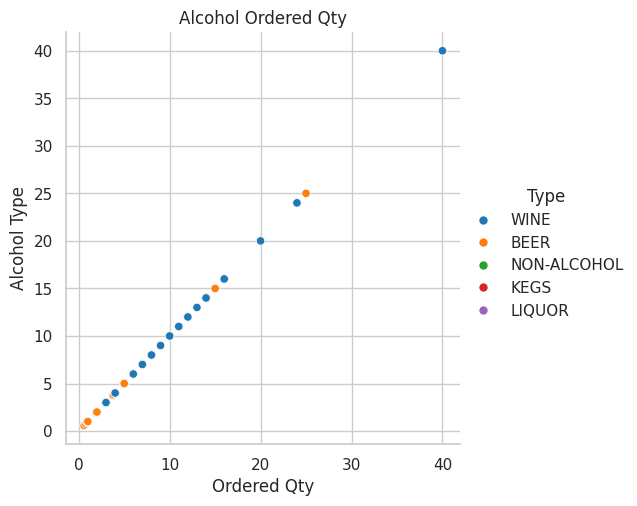

In [ ]:
df_top_100 = df.nlargest(100, 'Days to Fill')
sns.relplot(x = "Ordered Qty", y = "Fulfilled Qty", data = df, kind = "scatter", hue = "Type")
plt.title("Alcohol Ordered Qty")
plt.ylabel("Alcohol Type")
plt.show()

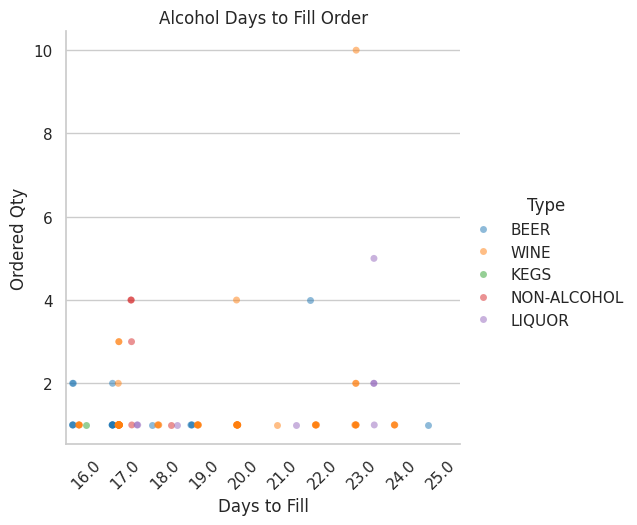

In [ ]:
df_top_100 = df.nlargest(100, 'Days to Fill')
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.catplot(x = "Days to Fill", y = "Ordered Qty", kind = "strip", data = df_top_100, errorbar = None, hue = "Type", alpha = 0.5, dodge = True)
plt.title("Alcohol Days to Fill Order")
plt.xticks(rotation = 45)
plt.show()


In [ ]:
fig = px.scatter(df,
                 x="Ordered Qty",
                 y="Days to Fill",
                 size="Ordered Qty",
                 color="Type",
                 hover_name="Item Description",
                 title="Shelf Space vs. Fulfillment Speed",
                 labels={"Ordered Qty": "Ordered Quantity", "Days to Fill": "Fulfillment Time in Days"},
                 template="plotly_dark")

fig.show()


In [ ]:
fig = px.scatter(df,
            x = "Ordered Qty",
            y = "Days to Fill",
            size = "Ordered Qty",
            hover_name = "Type",
            title = "Days it takes to fill each alcohol type",
            color = "Days to Fill",
                 )
fig.show()

In [ ]:
fig = px.box(df,
             x = "Type",
             y = "Days to Fill",
             color = "Type",
             title = "Alcohol Types and how long to fulfill",
             template = "plotly_white")
fig.show()

In [ ]:
fig = px.box(df,
             x = "Type",
             y = "Days to Fill",
             color = "Type",
             template = "plotly_dark")
fig.show()

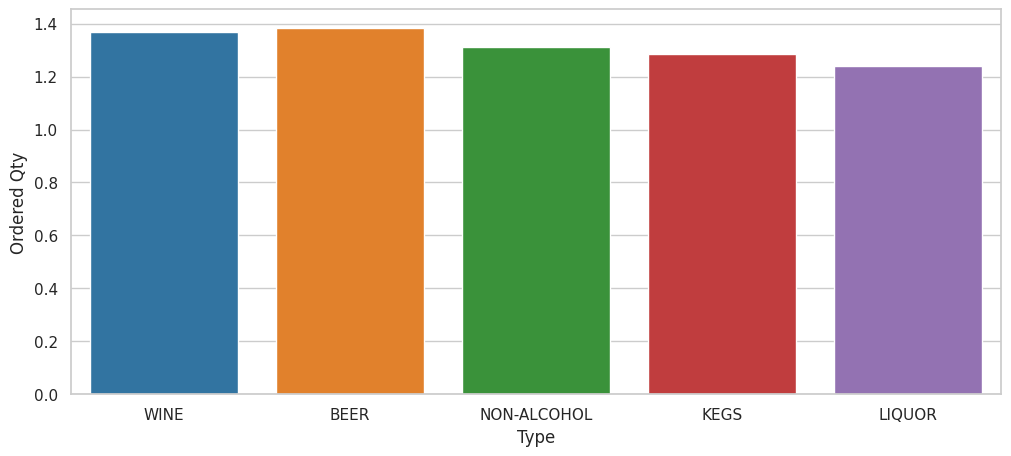

In [ ]:
df_sorted = df.sort_values("Ordered Qty", ascending = False)
plt.figure(figsize = (12,5))
sns.barplot(x = "Type", y = "Ordered Qty", data = df, hue = "Type", errorbar = None)
plt.show()

In [ ]:
df["Ordered Date"] = pd.to_datetime(df["Ordered Date"], format="%m/%d/%Y")
df["Month"] = df["Ordered Date"].dt.strftime("%B")

fig = px.bar(df.groupby("Month")[
    "Ordered Qty"].sum().reset_index(),
    x="Month",
    y="Ordered Qty",
    title="Total Orders Per Month",
    template="seaborn"
)

fig.show()


In [ ]:
df["Ordered Date"] = pd.to_datetime(df["Ordered Date"], format = "%m/%d/%y")
df["Month"] = df["Ordered Date"].dt.strftime("%b")

fig = px.line(df.groupby("Month")["Ordered Qty"].sum().reset_index(),
              x = "Month",
              y = "Ordered Qty",
              markers = True,
              title = "Alcohol Quantity by Month")
fig.show()


In [ ]:
df.columns

Index(['Supplier', 'Item Code', 'Item Description', 'Type', 'Tag',
       'Order Number', 'Order Status', 'PO Status', 'Ordered Qty',
       'Fulfilled Qty', 'Ordered Date', 'Received Date', 'Fulfillment Date',
       'Days to Fill', 'Month'],
      dtype='object')

In [ ]:
fig = px.violin(df,
            x = "Ordered Qty",
            y = "Days to Fill",
            points = "outliers",
            box = False,
            color = "Type",
                facet_col = "Type"
                 )
fig.show()

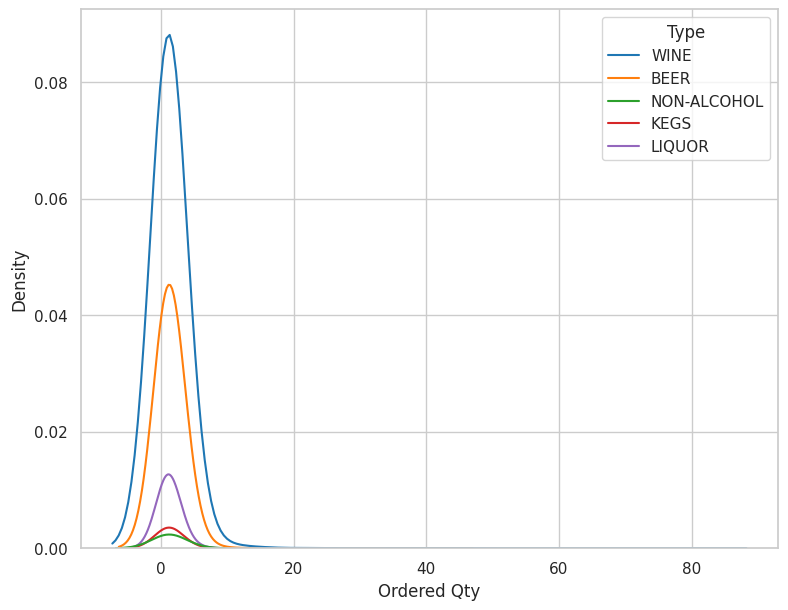

In [ ]:
plt.figure(figsize = (9,7))
sns.kdeplot(data = df, x = "Ordered Qty", hue = "Type", bw_adjust = 10)
sns.set_style("whitegrid")